In [78]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

import tensorflow as tf
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Нейронная сеть, состоящая из одного нейрона

In [5]:
model = Sequential([
    Dense(1, input_shape=(1,), activation='relu')
])

model.summary()

/home/andrew/netol_classes/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-09 19:35:31.278203: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.get_weights()

[array([[1.0465087]], dtype=float32), array([0.], dtype=float32)]

## Нейрон для умножения на 3

In [7]:
# Обучающие данные
X = np.array([[1], [3], [2], [10], [4], [7], [8]])
y = np.array([[3, 9, 6, 30, 12, 21, 24]]).T

In [8]:
X

array([[ 1],
       [ 3],
       [ 2],
       [10],
       [ 4],
       [ 7],
       [ 8]])

In [9]:
y

array([[ 3],
       [ 9],
       [ 6],
       [30],
       [12],
       [21],
       [24]])

In [10]:
# Создаем сеть
tf.random.set_seed(1)

model = Sequential([
    Dense(1, input_shape=(1,), activation='linear')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
w1, w0 = model.get_weights()
w1, w0

(array([[1.2296137]], dtype=float32), array([0.], dtype=float32))

In [12]:
# Подадим на вход модели одно значение:
model.predict(X[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


array([[1.2296137]], dtype=float32)

In [13]:
model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=['mae']
)

In [14]:
%%time
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step - loss: 108.8039 - mae: 8.8519
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 9.2421 - mae: 2.5291
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.7995 - mae: 0.7009
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0835 - mae: 0.2243
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0226 - mae: 0.1382
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0173 - mae: 0.1189
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.0166 - mae: 0.1128
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 0.0164 - mae: 0.1106
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0162 - mae: 0.1095
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0161 - mae: 0.1088
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0159 - mae: 0.1082
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0157 - mae: 0.1076
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63

In [15]:
user_inp1, user_inp2 = 5, -9
print(f"Проверка на новых данных: {user_inp1} {user_inp2}")
print("Предсказание нейронной сети")
print(model.predict(np.array([[user_inp1], [user_inp2]])))

Проверка на новых данных: 5 -9
Предсказание нейронной сети
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
[[ 15.039819]
 [-26.664919]]


In [16]:
nw1, nw0 = model.get_weights()
nw1, nw0

(array([[2.9789097]], dtype=float32), array([0.14526989], dtype=float32))

In [17]:
# Проверка на всех обучающих данных
pd.DataFrame({
    'true': np.squeeze(y),
    'pred': np.squeeze(model.predict(X))
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


,true,pred
0,3,3.124180
1,9,9.082000
2,6,6.103089
3,30,29.934366
4,12,12.060909
5,21,20.997637
6,24,23.976547


## Задача сложения чисел (сеть, состоящая из двух слоев)

In [18]:
X1 = np.random.randint(1, 10, size=50)
X2 = np.random.randint(1, 10, size=50)

y = X1 + X2

In [19]:
X1.shape

(50,)

In [20]:
X2.shape

(50,)

In [21]:
y.shape

(50,)

In [22]:
# Соединяем воходные данные:
X = np.vstack([X1, X2]).T
X

array([[4, 5],
       [2, 5],
       [1, 1],
       [4, 3],
       [2, 9],
       [3, 3],
       [7, 4],
       [8, 1],
       [4, 4],
       [5, 6],
       [7, 2],
       [1, 5],
       [7, 9],
       [6, 4],
       [2, 6],
       [7, 9],
       [8, 2],
       [9, 8],
       [3, 2],
       [8, 7],
       [6, 1],
       [1, 6],
       [6, 1],
       [9, 4],
       [2, 3],
       [1, 2],
       [5, 4],
       [6, 2],
       [4, 8],
       [9, 8],
       [7, 2],
       [7, 8],
       [7, 8],
       [2, 3],
       [6, 9],
       [4, 2],
       [9, 8],
       [3, 6],
       [3, 7],
       [9, 7],
       [3, 7],
       [7, 9],
       [8, 8],
       [2, 4],
       [5, 3],
       [6, 5],
       [4, 1],
       [6, 3],
       [8, 8],
       [4, 4]])

In [23]:
X.shape

(50, 2)

In [24]:
y = y[None]
y = y.T
y

array([[ 9],
       [ 7],
       [ 2],
       [ 7],
       [11],
       [ 6],
       [11],
       [ 9],
       [ 8],
       [11],
       [ 9],
       [ 6],
       [16],
       [10],
       [ 8],
       [16],
       [10],
       [17],
       [ 5],
       [15],
       [ 7],
       [ 7],
       [ 7],
       [13],
       [ 5],
       [ 3],
       [ 9],
       [ 8],
       [12],
       [17],
       [ 9],
       [15],
       [15],
       [ 5],
       [15],
       [ 6],
       [17],
       [ 9],
       [10],
       [16],
       [10],
       [16],
       [16],
       [ 6],
       [ 8],
       [11],
       [ 5],
       [ 9],
       [16],
       [ 8]])

In [25]:
y.shape

(50, 1)

In [27]:
# Масштабирование входных данных
mms = MinMaxScaler()
X_norm = mms.fit_transform(X)
X_norm

array([[0.375, 0.5  ],
       [0.125, 0.5  ],
       [0.   , 0.   ],
       [0.375, 0.25 ],
       [0.125, 1.   ],
       [0.25 , 0.25 ],
       [0.75 , 0.375],
       [0.875, 0.   ],
       [0.375, 0.375],
       [0.5  , 0.625],
       [0.75 , 0.125],
       [0.   , 0.5  ],
       [0.75 , 1.   ],
       [0.625, 0.375],
       [0.125, 0.625],
       [0.75 , 1.   ],
       [0.875, 0.125],
       [1.   , 0.875],
       [0.25 , 0.125],
       [0.875, 0.75 ],
       [0.625, 0.   ],
       [0.   , 0.625],
       [0.625, 0.   ],
       [1.   , 0.375],
       [0.125, 0.25 ],
       [0.   , 0.125],
       [0.5  , 0.375],
       [0.625, 0.125],
       [0.375, 0.875],
       [1.   , 0.875],
       [0.75 , 0.125],
       [0.75 , 0.875],
       [0.75 , 0.875],
       [0.125, 0.25 ],
       [0.625, 1.   ],
       [0.375, 0.125],
       [1.   , 0.875],
       [0.25 , 0.625],
       [0.25 , 0.75 ],
       [1.   , 0.75 ],
       [0.25 , 0.75 ],
       [0.75 , 1.   ],
       [0.875, 0.875],
       [0.1

In [28]:
model = Sequential([
    Dense(3, input_shape=(2,), activation='linear'),
    Dense(1, activation='linear')
])

model.summary()

/home/andrew/netol_classes/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.get_weights()

[array([[ 0.25361264, -0.6542394 , -1.0315018 ],
        [ 0.2133367 ,  1.0785265 ,  0.79379356]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.29187167],
        [-1.0346329 ],
        [ 0.34646964]], dtype=float32),
 array([0.], dtype=float32)]

In [31]:
model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=['mae']
)

In [32]:
model.fit(X_norm, y, epochs=200)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 127.3062 - mae: 10.4783 
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 102.4309 - mae: 9.2826 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 76.9060 - mae: 7.8699
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 48.1292 - mae: 5.9652
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 24.0302 - mae: 3.9491
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.7060 - mae: 2.6846
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 7.6204 - mae: 2.3003
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 6.3216 - mae: 2.1469
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 5.7212 - mae: 2.0592
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 5.3086 - mae: 1.9883
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 4.9599 - mae: 1.9237
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 4.6416 - mae: 1.8620 
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━

In [34]:
# Проверка на новых данных
test_X = [[4, 2],
          [6, 2]]

test_X = mms.transform(test_X)
print(model.predict(np.array(test_X)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[6.0001383]
 [8.000277 ]]


In [35]:
# Проверка на обучающих данных
pd.DataFrame({
    'x1': X[:, 0],
    'x2': X[:,1],
    'true': np.squeeze(y),
    'pred': np.squeeze(model.predict(X_norm))
}).head(10)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


,x1,x2,true,pred
0,4,5,9,8.999899
1,2,5,7,6.999760
2,1,1,2,2.000009
3,4,3,7,7.000059
4,2,9,11,10.999441
5,3,3,6,5.999989
6,7,4,11,11.000188
7,8,1,9,9.000496
8,4,4,8,7.999979
9,5,6,11,10.999888


## Сеть для классификации изображений

In [37]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [38]:
X_train[0].shape

(28, 28)

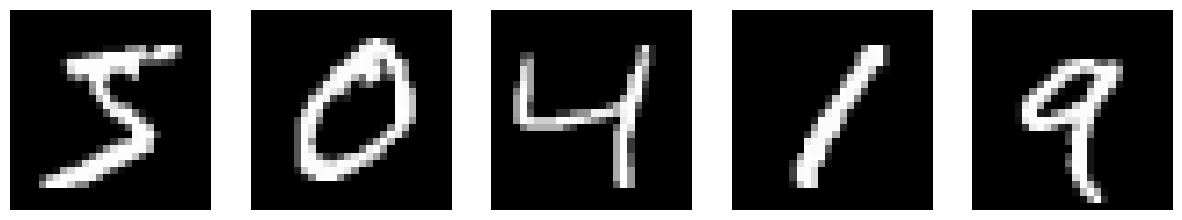

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].axis('off')

In [42]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Возьмем для обучения только два класса: 0 и 1

In [43]:
idxs = np.where((y_train == 0) | (y_train == 1))
y_train = y_train[idxs]

In [45]:
idxs

(array([    1,     3,     6, ..., 59984, 59987, 59994], shape=(12665,)),)

In [44]:
X_train = X_train[idxs]

In [46]:
X_train.shape, y_train.shape

((12665, 28, 28), (12665,))

И для теста тоже:

In [47]:
idxs = np.where((y_test == 0) | (y_test == 1))
y_test = y_test[idxs]

X_test = X_test[idxs]

X_test.shape, y_test.shape

((2115, 28, 28), (2115,))

Нормируем входные данные

In [48]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.min(), X_train.max())

0.0 1.0


Преобразуем преобразование целевых значений в бинарный вид

In [50]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

y_train[:5]

array([0, 1, 1, 1, 1], dtype=uint8)

In [51]:
y_train_cat[:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

Сожмем изображения до размеров 6 х 6 пикселей

In [53]:
X_train[..., np.newaxis].shape

(12665, 28, 28, 1)

In [56]:
X_train_resized = tf.image.resize(X_train[..., np.newaxis], (6, 6))[..., 0]
X_test_resized = tf.image.resize(X_test[..., np.newaxis], (6, 6))[..., 0]

2025-08-09 20:44:58.006148: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 79434880 exceeds 10% of free system memory.


In [61]:
tf.image.resize(X_train[..., np.newaxis], (6, 6)).shape

2025-08-09 20:46:23.635281: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 79434880 exceeds 10% of free system memory.


TensorShape([12665, 6, 6, 1])

In [59]:
X_train_resized.shape

TensorShape([12665, 6, 6])

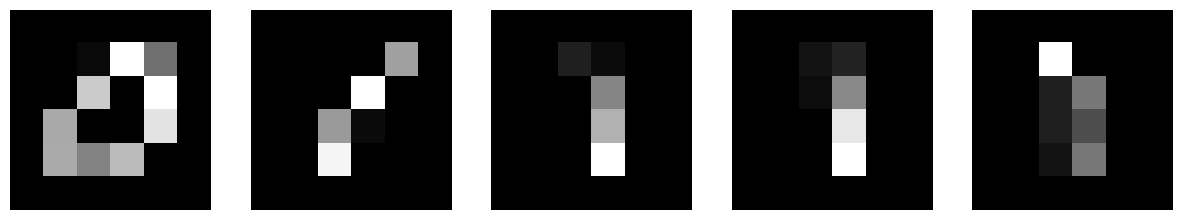

In [58]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(X_train_resized[i], cmap='gray')
    ax[i].axis('off')

Строим сеть:

In [67]:
# Преобразование матрицы картинок в вектор:
print(X_train_resized[0].shape)

print(X_train_resized[0].numpy().flatten().shape)

(6, 6)
(36,)


У нас 36 входов
Для преобразования матрицы с вектор используем специальный слой `Flatten`

In [70]:
tf.random.set_seed(9)

model = Sequential([
    Flatten(input_shape=(6, 6)),
    Dense(2, activation='sigmoid')
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            74 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74 (296.00 B)

 Trainable params: 74 (296.00 B)

 Non-trainable params: 0 (0.00 B)

В качестве функции потерь выбираем бинаргую кроссэнтропию

In [71]:
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [72]:
model.fit(X_train_resized, y_train_cat, epochs=5)

Epoch 1/5
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5332 - loss: 0.6704
Epoch 2/5
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8979 - loss: 0.5068
Epoch 3/5
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9605 - loss: 0.4090
Epoch 4/5
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9715 - loss: 0.3456
Epoch 5/5
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9738 - loss: 0.3017


In [73]:
print("Предсказание нейронной сети:")
pred = model.predict(X_test_resized[:1])
pred

Предсказание нейронной сети:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


array([[0.23251194, 0.77378374]], dtype=float32)

In [74]:
pred_cls = pred.argmax()
pred_cls

np.int64(1)

Text(0.5, 1.0, 'pred 1, true 1')

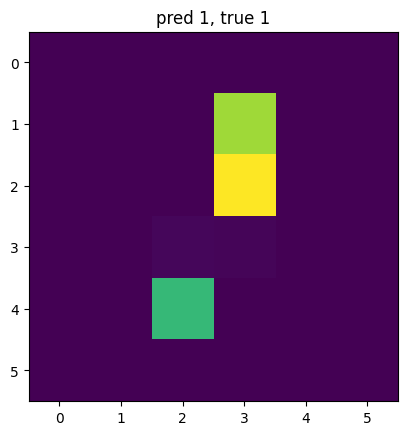

In [75]:
idx = 0
plt.imshow(X_test_resized[idx])
plt.title(f"pred {pred_cls}, true {y_test[idx]}")

Проверка на всех тестовых данных

In [76]:
preds = model.predict(X_test_resized)
preds

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.2325119 , 0.7737838 ],
       [0.8689652 , 0.11990918],
       [0.19895475, 0.80365276],
       ...,
       [0.18784791, 0.78121156],
       [0.8723079 , 0.19458957],
       [0.19098276, 0.8053301 ]], shape=(2115, 2), dtype=float32)

In [77]:
preds_cls = preds.argmax(axis=1)
preds_cls

array([1, 0, 1, ..., 1, 0, 1], shape=(2115,))

Посчитаем метрику качества

In [80]:
print(f"test acc: {accuracy_score(y_test, preds_cls)*100:.2f}% ({(y_test == preds_cls).sum()} out of {y_test.shape[0]})")

test acc: 98.35% (2080 out of 2115)
